*Source blog: https://analyticsindiamag.com/hands-on-guide-to-market-basket-analysis-with-python-codes/

*Data Source: https://www.kaggle.com/irfanasrullah/groceries?select=groceries+-+groceries.csv

The steps of working of the apriori algorithm can be given as:-

1. Define the minimum support and confidence for the association rule
2. Take all the subsets in the transactions with higher support than the minimum support
3. Take all the rules of these subsets with higher confidence than minimum confidence
4. Sort the association rules in the decreasing order of lift. 
5. Visualize the rules along with confidence and support.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from apyori import apriori

df = pd.read_csv('groceriesdetail.csv',header=None, skiprows=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df.shape

(9835, 33)

In [85]:
df = df.drop(df.columns[[0]], axis=1)  # drop first column which is not useful for analysis
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

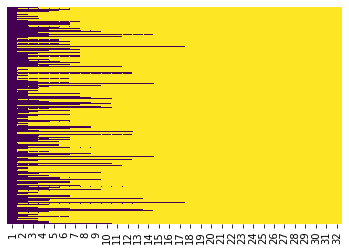

In [86]:
#Visualise if dataset has null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

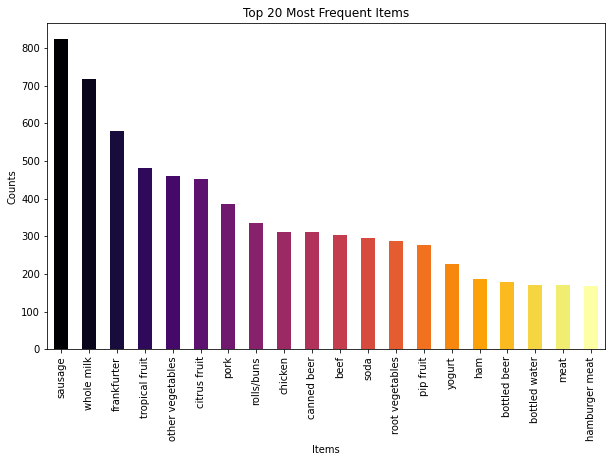

In [87]:
# Most Frequent Items Bar plot
import numpy as np
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,20))
df[1].value_counts().head(20).plot.bar(color = color)
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

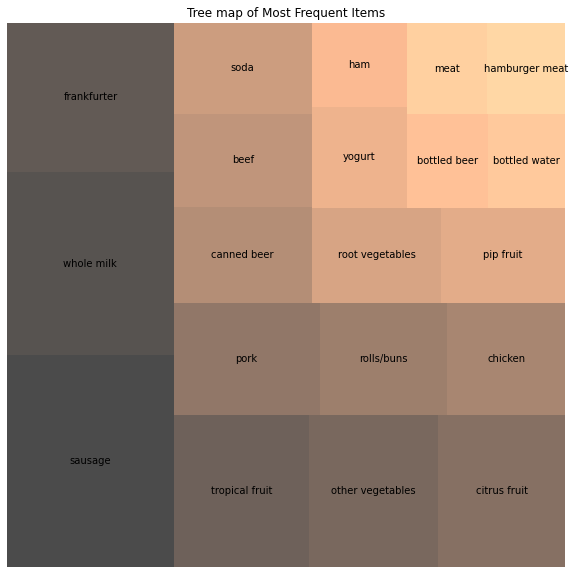

In [88]:
# Tree Map of Most Frequent Items
import squarify
plt.rcParams['figure.figsize']=(10,10)
Items = df[1].value_counts().head(20).to_frame()
size = Items[1].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,20))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Most Frequent Items')
plt.axis('off')
plt.show()

In [89]:
df['Items'] = 'items'
df1 = df.truncate(before=-1,after=10)
df1.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,Items
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,items
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,items
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,items
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,items
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,items


In [81]:
import networkx as nx

Items = nx.from_pandas_edgelist(df1, source = 'Items', target = 0, edge_attr = True)

plt.rcParams['figure.figsize'] = (20,20)
nx.draw_networkx_nodes(G=Items,pos=nx.spring_layout(Items), node_size=15000,node_color='green')
nx.draw_networkx_edges(G=Items,pos=nx.spring_layout(Items), alpha=0.6, width=3 ,edge_color='black')
nx.draw_networkx_labels(G=Items,pos=nx.spring_layout(Items),font_size=20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices', fontsize = 20)
plt.show()

KeyError: 0

In [90]:
#Getting the list of transactions from the dataset
transactions = []
for i in range(1, 9835):
    transactions.append([str(df.values[i,j]) for j in range(0, 32)])

Now once we are ready with the list of items in our training set, we need to run the apriori algorithm which will learn the list of association rules from the training set. Suppose we want to find the association of items with a product which is sold at least 3 times a day. So, the minimum support here will be 3 items per day multiplied by 7 days of weak and divided by the total number of transactions. 

That means (3*7)/9835 =  0.002135231. So the equivalent 0.002 is taken here as support. Now let us we are looking for a 30% confidence in the association rule so we have kept 0.3 as the minimum confidence. The minimum lift is taken as 3 and the minimum length is considered as 2 because we want to find an association between a minimum of two items. These hyperparameters can be tuned depending on the business requirements. 

In [65]:
# Training Apriori algorithm on the dataset
rule_list = apriori(transactions, min_support = 0.002, min_confidence = 0.3, min_lift = 3, min_length = 2)

After executing the above line of code, we have generated the list of association rules between the items of the retail. To see these rules, the below line of code needs to be executed.

In [66]:
# Printing the list of rules
results = list(rule_list)
for i in results:
    print('\n')
    print(i)
    print('**********') 



RelationRecord(items=frozenset({'hamburger meat', 'Instant food products'}), support=0.003050640634533252, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.37974683544303794, lift=11.420276390663105)])
**********


RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.017388651616839536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'root vegetables'}), confidence=0.3313953488372093, lift=3.0400577056577576)])
**********


RelationRecord(items=frozenset({'bottled beer', 'liquor'}), support=0.004677648972950987, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liquor'}), items_add=frozenset({'bottled beer'}), confidence=0.42201834862385323, lift=5.2400611620795114)])
**********


RelationRecord(items=frozenset({'herbs', 'root vegetables'}), support=0.007016473459426479, ordered_statistics=[OrderedStatistic(items_base=frozens



RelationRecord(items=frozenset({'tropical fruit', 'yogurt', 'bottled water', 'whole milk'}), support=0.0036607687614399025, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tropical fruit', 'bottled water', 'whole milk'}), items_add=frozenset({'yogurt'}), confidence=0.45569620253164556, lift=3.266265638262538), OrderedStatistic(items_base=frozenset({'yogurt', 'bottled water', 'whole milk'}), items_add=frozenset({'tropical fruit'}), confidence=0.37894736842105264, lift=3.611015911872705)])
**********


RelationRecord(items=frozenset({'nan', 'yogurt', 'curd', 'brown bread'}), support=0.0023388244864754933, ordered_statistics=[OrderedStatistic(items_base=frozenset({'curd', 'brown bread'}), items_add=frozenset({'nan', 'yogurt'}), confidence=0.47916666666666674, lift=3.4369985412107957), OrderedStatistic(items_base=frozenset({'nan', 'curd', 'brown bread'}), items_add=frozenset({'yogurt'}), confidence=0.47916666666666674, lift=3.4344934402332363)])
**********


RelationRecord(it


RelationRecord(items=frozenset({'whole milk', 'tropical fruit', 'root vegetables', 'domestic eggs'}), support=0.002745576571079927, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tropical fruit', 'root vegetables', 'domestic eggs'}), items_add=frozenset({'whole milk'}), confidence=0.7714285714285715, lift=3.018793701324541), OrderedStatistic(items_base=frozenset({'whole milk', 'root vegetables', 'domestic eggs'}), items_add=frozenset({'tropical fruit'}), confidence=0.3214285714285714, lift=3.0629152823920265), OrderedStatistic(items_base=frozenset({'whole milk', 'tropical fruit', 'domestic eggs'}), items_add=frozenset({'root vegetables'}), confidence=0.39705882352941174, lift=3.642422080772607)])
**********


RelationRecord(items=frozenset({'whole milk', 'whipped/sour cream', 'root vegetables', 'domestic eggs'}), support=0.002033760423022168, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whole milk', 'whipped/sour cream', 'domestic eggs'}), items_add=frozens

**********


RelationRecord(items=frozenset({'whipped/sour cream', 'rolls/buns', 'root vegetables', 'other vegetables'}), support=0.00254220052877771, ordered_statistics=[OrderedStatistic(items_base=frozenset({'whipped/sour cream', 'rolls/buns', 'other vegetables'}), items_add=frozenset({'root vegetables'}), confidence=0.3787878787878788, lift=3.4748134328358207), OrderedStatistic(items_base=frozenset({'whipped/sour cream', 'rolls/buns', 'root vegetables'}), items_add=frozenset({'other vegetables'}), confidence=0.5813953488372093, lift=3.0044360801182957)])
**********


RelationRecord(items=frozenset({'rolls/buns', 'root vegetables', 'other vegetables', 'whole milk'}), support=0.006202969290217612, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rolls/buns', 'other vegetables', 'whole milk'}), items_add=frozenset({'root vegetables'}), confidence=0.34659090909090906, lift=3.1794542910447756)])
**********


RelationRecord(items=frozenset({'yogurt', 'rolls/buns', 'root vegetab

RelationRecord(items=frozenset({'nan', 'pork', 'other vegetables', 'domestic eggs', 'whole milk'}), support=0.002033760423022168, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pork', 'domestic eggs'}), items_add=frozenset({'nan', 'other vegetables', 'whole milk'}), confidence=0.3636363636363636, lift=4.865306122448978), OrderedStatistic(items_base=frozenset({'nan', 'pork', 'domestic eggs'}), items_add=frozenset({'other vegetables', 'whole milk'}), confidence=0.3636363636363636, lift=4.858695652173912), OrderedStatistic(items_base=frozenset({'pork', 'whole milk', 'domestic eggs'}), items_add=frozenset({'nan', 'other vegetables'}), confidence=0.5882352941176471, lift=3.041380590090926), OrderedStatistic(items_base=frozenset({'nan', 'pork', 'whole milk', 'domestic eggs'}), items_add=frozenset({'other vegetables'}), confidence=0.5882352941176471, lift=3.039782386943217)])
**********


RelationRecord(items=frozenset({'nan', 'other vegetables', 'domestic eggs', 'root vegetables